#Project 2

##Data and Imports

###Data


Let's start by uploading the data.

In [ ]:
!pip install gdown
!pip install --upgrade gdown
!gdown https://drive.google.com/uc?id=19x-HzU_5PYeNEFoiA6UrzoP4T_jiTmLl
!gdown https://drive.google.com/uc?id=1xoR6bAZDUDBURuf6HFG4GLRT40EQKS02
!gdown https://drive.google.com/uc?id=1Zu1J6-Zwk6GwnJHT_5ajOfJULM64W1su

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=19x-HzU_5PYeNEFoiA6UrzoP4T_jiTmLl
To: /content/X_test.csv
100% 32.7M/32.7M [00:00<00:00, 49.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1xoR6bAZDUDBURuf6HFG4GLRT40EQKS02
From (redirected): https://drive.google.com/uc?id=1xoR6bAZDUDBURuf6HFG4GLRT40EQKS02&confirm=t&uuid=fc68d643-8280-4e80-9968-43366ce2bae7
To: /content/X_train.csv
100% 186M/186M [00:03<00:00, 55.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Zu1J6-Zwk6GwnJHT_5ajOfJULM64W1su
To: /content/y_train.csv
100% 66.6k/66.6k [00:00<00:00, 53.4MB/s]


###Imports


Let's import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

from scipy.stats import spearmanr

##Exercise 1

###Convert Data

Convert .csv files to pandas data frames

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")

###Information about data

Let's get infomation about size, types and check if data is complete

Let's inspect X_train

In [ ]:
X_train.info()
print()
X_train.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Columns: 9000 entries, LINC01128 to AC007325.4
dtypes: float64(9000)
memory usage: 260.5 MB



False

In [ ]:
X_train.describe()

,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF18,...,CLIC2,F8A3,TMLHE,VAMP7,MT-ND1,MT-ND2,MT-CO2,MT-CO3,MT-ND6,AC007325.4
count,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,...,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000
mean,0.041460,0.003387,0.003985,0.072602,0.003445,0.010660,0.173860,0.001809,0.008694,0.022274,...,0.042586,0.002549,0.028767,0.050851,2.834158,2.680533,3.632816,3.604820,0.392789,0.002328
std,0.221318,0.057512,0.059494,0.252317,0.058111,0.105717,0.412498,0.041009,0.089460,0.158567,...,0.298006,0.049738,0.161980,0.213200,0.728043,0.729410,0.508108,0.532785,0.571639,0.044560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.428880,2.307524,3.366246,3.316843,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.892495,2.776842,3.636466,3.609220,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.321204,3.167051,3.926476,3.907586,0.812892,0.000000
max,3.093561,1.509521,1.274583,2.733353,1.586258,1.986595,3.811058,1.398080,1.766220,1.830835,...,4.373744,1.429041,3.717716,3.242324,5.701087,5.539158,6.553581,6.200545,3.283473,1.654303


Data in X_train are complete there are 3794 entries and are of type float64

Let's inspect y_train

In [ ]:
y_train.info()
print()
y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        3794 non-null   int64  
 1   Expected  3794 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 59.4 KB



,Id,Expected
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [ ]:
y_train.describe()

,Id,Expected
count,3794.000000,3794.000000
mean,1896.500000,0.789212
std,1095.377789,0.867207
min,0.000000,0.000000
25%,948.250000,0.000000
50%,1896.500000,0.303113
75%,2844.750000,1.667722
max,3793.000000,2.869365


y_train have columns: Id and Expected. There are 3794 entries so it matches X_train. All values are non-null. Id is integer and Expected is float64

Let's inspect X_test

In [ ]:
X_test.info()
print()
X_test.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Columns: 9000 entries, LINC01128 to AC007325.4
dtypes: float64(9000)
memory usage: 46.0 MB



False

In [ ]:
X_test.describe()

,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF18,...,CLIC2,F8A3,TMLHE,VAMP7,MT-ND1,MT-ND2,MT-CO2,MT-CO3,MT-ND6,AC007325.4
count,670.000000,670.0,670.00000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,...,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.047457,0.0,0.00555,0.079493,0.001509,0.007580,0.187247,0.004150,0.008517,0.023292,...,0.052786,0.003300,0.023732,0.046337,2.859897,2.718018,3.641196,3.641059,0.354980,0.001106
std,0.256676,0.0,0.07515,0.263519,0.030401,0.093087,0.420861,0.063622,0.098856,0.175307,...,0.304908,0.056432,0.185081,0.231104,0.729679,0.708765,0.532540,0.544276,0.537636,0.021982
min,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.439585,2.343799,3.359616,3.347639,0.000000,0.000000
50%,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.935777,2.806965,3.650874,3.654941,0.000000,0.000000
75%,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.330933,3.187837,3.921044,3.921526,0.740403,0.000000
max,3.093561,0.0,1.42223,1.988998,0.738686,1.706130,2.521518,1.167520,1.766220,2.305110,...,3.242324,1.270041,3.717716,3.242324,5.162913,4.362844,5.902668,5.745448,3.050084,0.527733


In [ ]:
columns_matching_names = X_train.columns == X_test.columns
columns_matching_names.sum()

9000

X_test have 670 entries and all are of float64 type. There are no null values and columns names matches X_Train columns.

###Response statistics and distribution

Now, let's explore basic statistics about our response

In [ ]:
y_train['Expected'].describe()

count    3794.000000
mean        0.789212
std         0.867207
min         0.000000
25%         0.000000
50%         0.303113
75%         1.667722
max         2.869365
Name: Expected, dtype: float64

From above we see that values range from 0.0 to 2.87. Mean is 0.78, standard deviation is 0.86, median is 0.3.

Let's now look at histogram of response

In [ ]:
px.histogram(y_train['Expected'])

From the histogram above we see that almost half of observation is close or equal to 0. Histogram doesn't resemble normal distribution at all. There are also more observation in range 0.25-0.35. What's interesting is that there is only one observation in range 0.05-0.015

In [ ]:
y_train[y_train['Expected'] < 0.000001].count()

Id          1539
Expected    1539
dtype: int64

###Correlation with response

Because response is far from being normally distributed we are going to use spearmanr to explore correlations. We assume $\alpha$ = 0.05

Let's find 250 columns most closely correlated with response

In [ ]:
stat_values = []
alpha = 0.05

for column in X_train.columns:
  stat, pvalue = spearmanr(X_train[column], y_train['Expected'])
  if (pvalue < 0.05):
    stat_values.append((column, stat))

stat_values = sorted(stat_values, key=lambda x: abs(x[1]), reverse=True)
stat_values = stat_values[:250]
stat_values = np.array(stat_values)
print(stat_values)

[['CD36' '0.614626324973792']
 ['VCAN' '0.6077532791991095']
 ['FCN1' '0.6076495387985926']
 ['FTH1' '0.5882264913359891']
 ['RPS27' '-0.5701660085289277']
 ['CD14' '0.5670370157916291']
 ['BLVRB' '0.5658198388454992']
 ['S100A12' '0.5576126986699934']
 ['MNDA' '0.5555679108015059']
 ['CST3' '0.5505958442376908']
 ['FTL' '0.54885412767971']
 ['S100A9' '0.5461082375351952']
 ['S100A8' '0.5399785837876216']
 ['LGALS3' '0.5219844389046646']
 ['CYBB' '0.5205749416458325']
 ['IFI30' '0.5196647529584619']
 ['MS4A6A' '0.5193477587646876']
 ['RPS27A' '-0.5150577058971539']
 ['PSAP' '0.5117298210869089']
 ['RPL3' '-0.5098525007583172']
 ['B2M' '-0.5016776959357376']
 ['RPL23A' '-0.49929657186127985']
 ['RPL10' '-0.49912110555525036']
 ['CSTA' '0.4913163679463573']
 ['GRN' '0.4906165674921181']
 ['S100A6' '0.49025471572242507']
 ['RPS29' '-0.4897576274783588']
 ['LYZ' '0.48933239689511016']
 ['CTSS' '0.48279206628965904']
 ['RPS19' '-0.4781317572705456']
 ['RPS3' '-0.4769298386426053']
 ['NCF2' 

This is heatmap of pairs of 250 columns most closely correlated with response. I'll use spearman since I don't assume normal distribution in data.

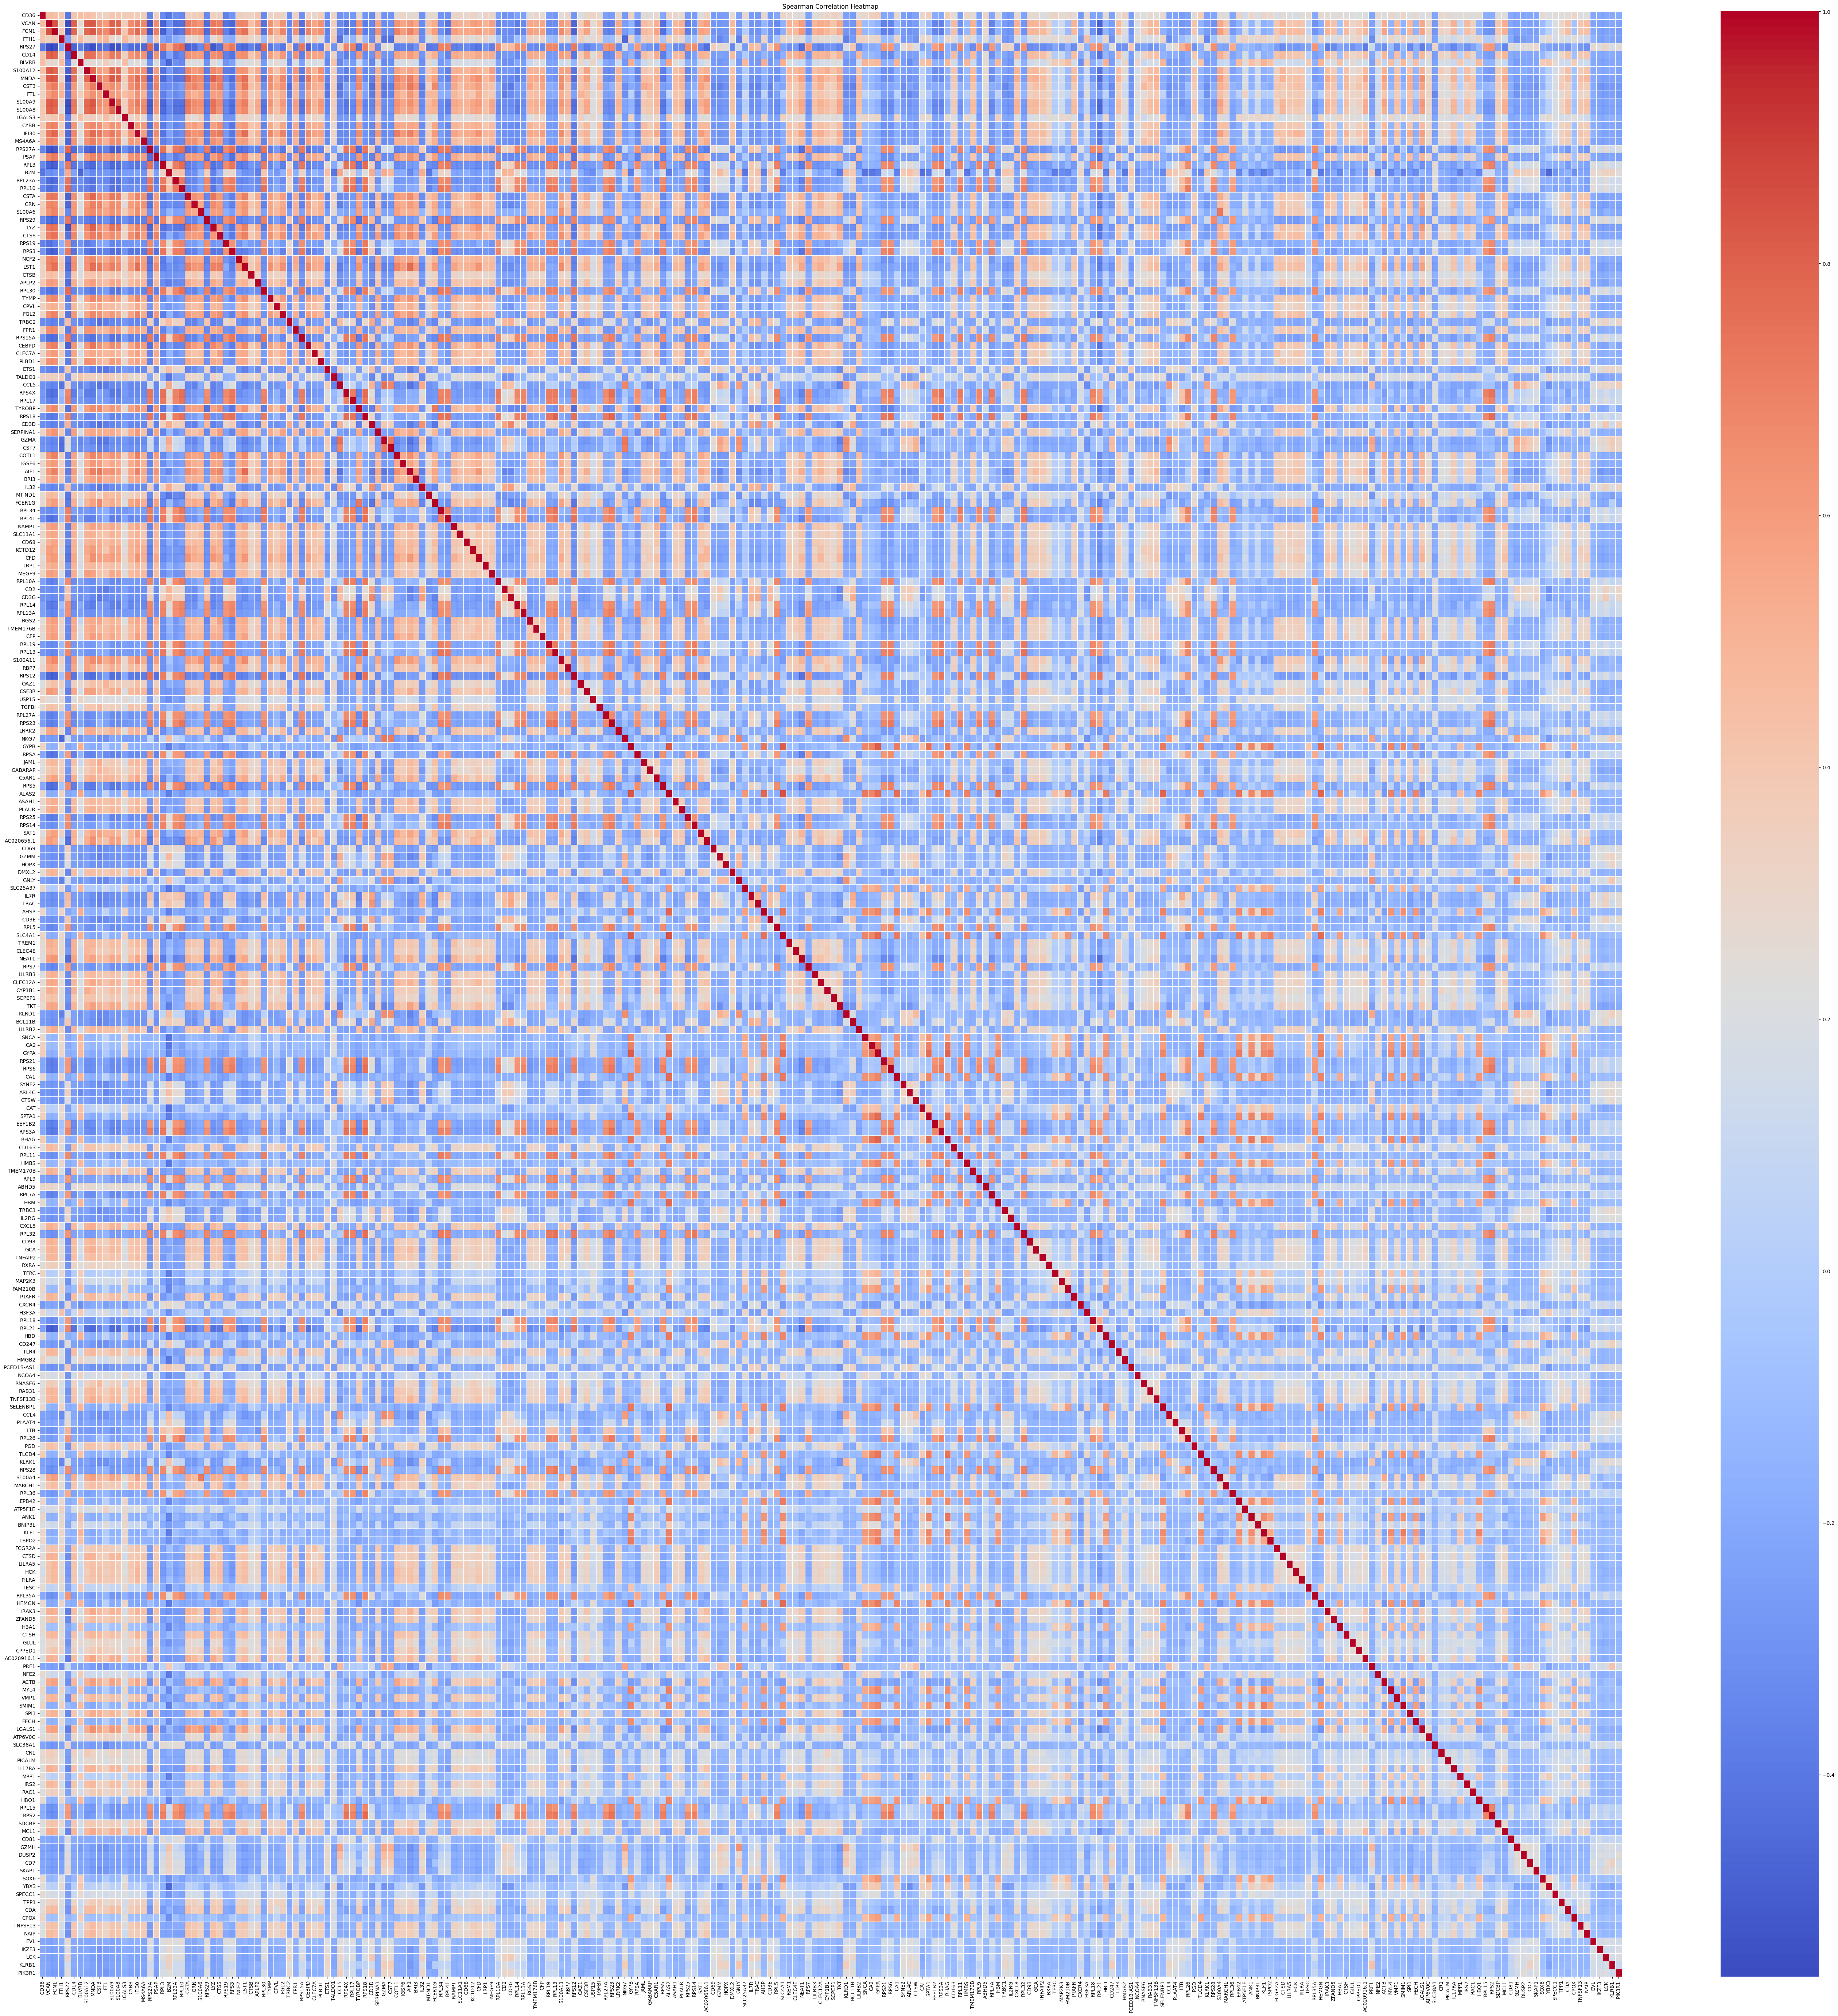

In [ ]:
columns_correlated = stat_values[:, 0]
X_train_corr = X_train[columns_correlated]

plt.figure(figsize=(70, 70))
sns.heatmap(X_train_corr.corr(method='spearman'), cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

There are many pairs of variables that are correlated based on that heatmap.

##Exercise 2

###Scale Data

Before building Elastic Net model we need to scale X_train. Data needs to be scaled in order for shrinkage penalty to have similar effect on all $\beta$ parameters of Elastic Net. We are going to use scaled data in next exercises too.

In [ ]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

###Elastic Net overview

Elastic Net is a type of linear regression. It estimates linear regression coefficients. It minimizes RSS + $\lambda_1||\beta||_1$ + $\lambda_2||\beta||_2^2$ (There are many notations and ways to write this formula). It applies shrinkage penalty in order to control variance of the model by reducing dimension and making our model more conservative. The tuning parameter $\lambda$ serves to control the relative impact of shrinking on the regression coefficient estimates. It's crucial to find an optimal value of $\lambda$. High $\lambda$ means larger bias but smaller variance. Dually, low $\lambda$ means smaller bias but larger variance. $\lambda$ is called alpha in scikit ElasticNet. l1_ratio parameter controls combination of L1 and L2 penalty.  For l1_ratio = 0 the penalty is an L2 penalty - which is Ridge Regression. For l1_ratio = 1 it is an L1 penalty - which is Lasso. fit_intercept parameter fits intercept if not included in Data. Rest of parameters are not that important from the theoretical standpoint. They control computations e.g. tol parameter is the tolerence of optimization for numerical reasons, max_iter controls maximal number of iterations run by the coordinate descent solver to reach the specified tolerance.


###Grid and training

Let's perform grid search with alpha and l1_ratio because they have the most significant influence on model (It's written in the task to use all hyperparamaters but I consciously chose those two since I find other hyperparameters to be neglectable in this case). For model performence estimation we are going to use 5-fold cross validation. It has certain benefits. LOOCV has higher variance of estimating test RMSE since all n models are closely correlated. On ther other hand k-fold cross validation where k is large results in higher bias in test RMSE because model is trained on less data. It's been shown empirically that k-fold cross validation is the most accurate with $k \in [5,10]$. I'm going to go with k = 5 for more efficient computations. I'm going to perform it using KFold() function with random_state = 42 in order to be able to recreate the same split.

In grid we are going to use tol value of 0.5 in order to deal with problems with convergence. Values of alpha are in {2.5, 5, 7.5, 10}. l1_ratio are in {0, 0.25, 0.5, 0.75, 1}

In [ ]:
elasticNet = ElasticNet()

param_grid = {'alpha': np.linspace(2.5, 10, 4),
              'l1_ratio': np.linspace(0, 1, 5),
              'tol': [0.5]}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=elasticNet, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)
grid_search.fit(X_train_scaled, y_train['Expected'])

print("Optimal parameters: ", grid_search.best_params_)

best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE: ", best_rmse)

Optimal parameters:  {'alpha': 5.0, 'l1_ratio': 0.0, 'tol': 0.5}
Best RMSE:  0.368154038806353


It turns out that with this grid used the best model is Ridge Regression with alpha 5.0 (measured by 5-fold cross-validation RMSE).

In [ ]:
elasticNet = ElasticNet(alpha=0.5, l1_ratio=0, tol=0.5)
elasticNet.fit(X_train_scaled, y_train['Expected'])

y_train_pred = elasticNet.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train['Expected'], y_train_pred))
print("Training RMSE: ", train_rmse)

best_rmse = np.sqrt(-grid_search.best_score_)
print("5-fold Mean Cross-validation RMSE: ", best_rmse)

Training RMSE:  0.12852583159049882
5-fold Mean Cross-validation RMSE:  0.368154038806353


As we can see from above training RMSE is 0.128 and 5-fold Mean Cross-validation RMSE: 0.368. This expected behaviour that CV RMSE is greater than training RMSE. ElasticNet works best with linear data, which we don't assume in this case.

##Exercise 3

###Random forest training

In random forest we build many decision trees (from bootstrapped data) and then usually take mean of predicions of each tree. But it has this advantage over bagging that when making split we randomly choose subset of features. It helps us to avoid overfitting. It's also worth noting that in random forest method training more trees doesn't lead to overfitting but it takes much time to fit more trees.

n_estimators is responsible for number of trees that we are going to train. max_depth is responsible for depth of trees - trees that are too deep may lead to overfitting. max_features is reponsible for percentage of chosen features while performing split. Random forest with max_features = 1 is bagging.

Cross validation split is with the same like in ElasticNet (random_state=42).

In [ ]:
random_forest = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [1, 10, 20],  # Number of trees in the forest
    'max_depth': [4, 5, 6],  # Maximum depth of the tree
    'max_features': [0.1, 0.5, 1]
}

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kf)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train['Expected'])

# Print the optimal parameters
print("Optimal parameters: ", grid_search.best_params_)

# Calculate and print the best RMSE
best_rmse = np.sqrt(-grid_search.best_score_)
print("Best RMSE: ", best_rmse)

Optimal parameters:  {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 10}
Best RMSE:  0.3419030042490476


We found the best parameters in this grid to be {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 10} measured by RMSE in 5-fold cross-validation.

###Model summary

Let's make summary of ElasticNet model, Random Forest model and Reference model to compare them.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ElasticNet
elastic_net = ElasticNet(alpha=5, l1_ratio=0, tol=0.5)
scores_elastic = cross_val_score(elastic_net, X_train_scaled, y_train['Expected'],
                                 scoring='neg_mean_squared_error', cv=kf)
scores_elastic = np.sqrt(-scores_elastic)

# Random forest
random_forest = RandomForestRegressor(max_depth=5, max_features=0.5, n_estimators=10)
scores_forest = cross_val_score(random_forest, X_train_scaled, y_train['Expected'],
                                scoring='neg_mean_squared_error', cv=kf)
scores_forest = np.sqrt(-scores_forest)

# Reference model - mean of y_train['Expected']
dummy_regressor = DummyRegressor(strategy='mean')
scores_dummy = cross_val_score(dummy_regressor, X_train_scaled, y_train['Expected'],
                               scoring='neg_mean_squared_error', cv=kf)
scores_dummy = np.sqrt(-scores_dummy)

# Summarize cross-validation scores
results = pd.DataFrame({
    'ElasticNet': scores_elastic,
    'RandomForest': scores_forest,
    'ReferenceModel': scores_dummy
})

# Calculate mean and standard deviation
mean_std = results.agg(['mean', 'std'])

# Concatenate the mean and standard deviation to the results DataFrame
results = pd.concat([results, mean_std])

# Rename the index for better readability
results.index = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Mean', 'Std']

results

,ElasticNet,RandomForest,ReferenceModel
Fold1,0.365703,0.342451,0.867617
Fold2,0.376695,0.358122,0.885669
Fold3,0.369418,0.331694,0.863206
Fold4,0.348014,0.314015,0.880039
Fold5,0.380087,0.361734,0.840717
Mean,0.367983,0.341603,0.867450
Std,0.012534,0.019610,0.017486


In summary RandomForest turned out to be the best (In each fold). Both ElasticNet and RandomForest are significantly better than ReferenceModel.

##Exercise 4

###Model selection

For training my own model I decided to use xgboost, because of the universality of this solution. It encompasses boosting method, with size reduction by controlling parameters in a similiar way like in Elastic Net ('lambda' nad 'alpha'). It also has a parameter to randomly select a subset of features to build a tree to control overfitting ('colsample_bytree'). After smartly training models using different sets of parameters with help of optuna and my sense, I managed to found parameters for which 5-fold cross validation RMSE was 0.3167. The best model involved building 444 trees of max depth 4 with learning rate 0.019. Data was scaled for training.

In [ ]:
param = {
    'verbosity': 0,
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 444,
    'max_depth': 4,
    'learning_rate': 0.019054865639639856,
    'subsample': 1.0,
    'colsample_bytree': 0.1609600438835683,
    'gamma': 2.6593062100748803e-05,
    'lambda': 1.2275836587101705,
    'alpha': 1.4781676478563648
}

# Create the XGBoost model with the suggested hyperparameters
model = xgb.XGBRegressor(**param)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train['Expected'], scoring='neg_mean_squared_error', cv=kf)

# Calculate the average RMSE
rmse = np.sqrt(-scores.mean())
print(f'RMSE: {rmse}')


# model.fit(X_train_scaled, y_train['Expected'])
# y_pred = model.predict(X_test_scaled)

# y_pred = pd.DataFrame(y_pred, columns=['Expected'])
# y_pred['Id'] = y_pred.index
# y_pred = y_pred[['Id', 'Expected']]
# y_pred.describe()
# y_pred.to_csv('mk448287_predykcja.csv', index=False)

RMSE: 0.3167159747855417


##Final Note

In this project I wrote code on my own with the use of documentation https://scikit-learn.org/, https://xgboost.readthedocs.io/en/stable/parameter.html and I asked LLMs for help with repeatable tasks.